# 1. Deck Matchups DataFrames

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## First CSV - May 2nd

This is the most recent deck data at the time of this project. This csv comes from http://metastats.net/archetype/matchup/, which was downloaded at 11:12am on May 7th and is from data from 5 days ago. Yes the meta changes fairly quickly, but this should still be EXTREMELY helpful.

In [52]:
df_may2 = pd.read_csv('metastats-deck-matchup-1557248006.csv')
df_may2.head()

,player_class,player_archetype,opponent_class,opponent_archetype,win_rate,total_games,date_published
0,Druid,Token Druid,Druid,Token Druid,50.00,12038,05/02/2019 06:05 PM
1,Druid,Token Druid,Hunter,Deathrattle Hunter,68.70,2316,05/02/2019 06:05 PM
2,Druid,Token Druid,Hunter,Midrange Hunter,51.07,3634,05/02/2019 06:05 PM
3,Druid,Token Druid,Hunter,Spell Hunter,57.36,5969,05/02/2019 06:05 PM
4,Druid,Token Druid,Mage,Burn Mage,55.37,1519,05/02/2019 06:05 PM


In [53]:
df_may2.describe()

,win_rate,total_games
count,436.000000,436.000000
mean,50.000000,1587.091743
std,11.075152,2433.297530
min,22.110000,103.000000
25%,42.117500,298.000000
50%,50.000000,702.000000
75%,57.882500,1711.000000
max,77.890000,22554.000000


In [54]:
df_may2.shape

(436, 7)

In [55]:
df_may2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
player_class          436 non-null object
player_archetype      436 non-null object
opponent_class        436 non-null object
opponent_archetype    436 non-null object
win_rate              436 non-null float64
total_games           436 non-null int64
date_published        436 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 23.9+ KB


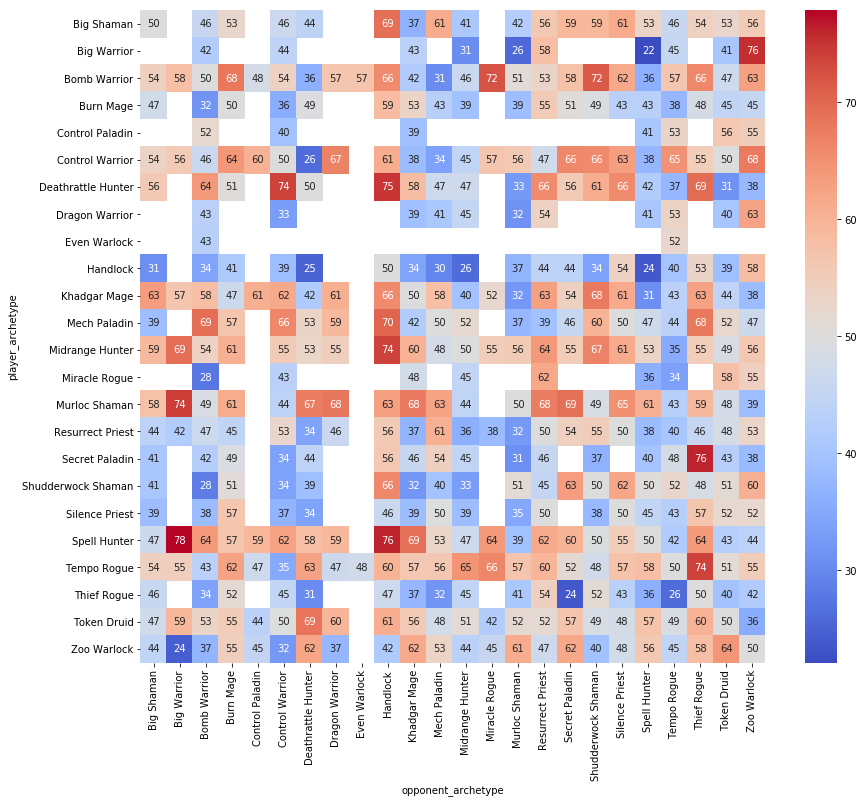

In [56]:
plt.figure(figsize= (14,12))
df_heatmap = df_may2.pivot("player_archetype", "opponent_archetype", "win_rate")
sns.heatmap(df_heatmap, annot = True, cmap = 'coolwarm')

In [49]:
# lets look at even warlock - lots of seemingly missing data despite 

In [57]:
df_may2[df_may2['player_archetype'] == 'Even Warlock']

,player_class,player_archetype,opponent_class,opponent_archetype,win_rate,total_games,date_published
324,Warlock,Even Warlock,Rogue,Tempo Rogue,52.45,143,05/02/2019 06:05 PM
325,Warlock,Even Warlock,Warrior,Bomb Warrior,42.86,133,05/02/2019 06:05 PM


OH there just literally is not every possible matchup. 
We will delete the decks like "Even Warlock" since there isnt enough data there - maybe also "Control Paladin", 
Also, we need to find these decks and get their decklist.

## Second CSV - May 10th 

In [59]:
df_may10 = pd.read_csv('metastats-deck-matchup-1557516576.csv')
df_may10.head()

,player_class,player_archetype,opponent_class,opponent_archetype,win_rate,total_games,date_published
0,Druid,Token Druid,Druid,Token Druid,50.00,6080,05/10/2019 12:05 PM
1,Druid,Token Druid,Hunter,Deathrattle Hunter,69.92,1097,05/10/2019 12:05 PM
2,Druid,Token Druid,Hunter,Mech Hunter,55.56,5497,05/10/2019 12:05 PM
3,Druid,Token Druid,Hunter,Midrange Hunter,52.67,2546,05/10/2019 12:05 PM
4,Druid,Token Druid,Hunter,Secret Hunter,62.02,516,05/10/2019 12:05 PM


In [61]:
df_may10.describe()

,win_rate,total_games
count,480.000000,480.000000
mean,50.000021,1301.191667
std,11.033859,2120.985713
min,23.260000,107.000000
25%,42.197500,234.000000
50%,50.000000,530.500000
75%,57.802500,1505.000000
max,76.740000,23012.000000


In [93]:
player_class_list = list(df_may10['player_class'].unique())
player_class_list


['Druid',
 'Hunter',
 'Mage',
 'Paladin',
 'Priest',
 'Rogue',
 'Shaman',
 'Warlock',
 'Warrior']

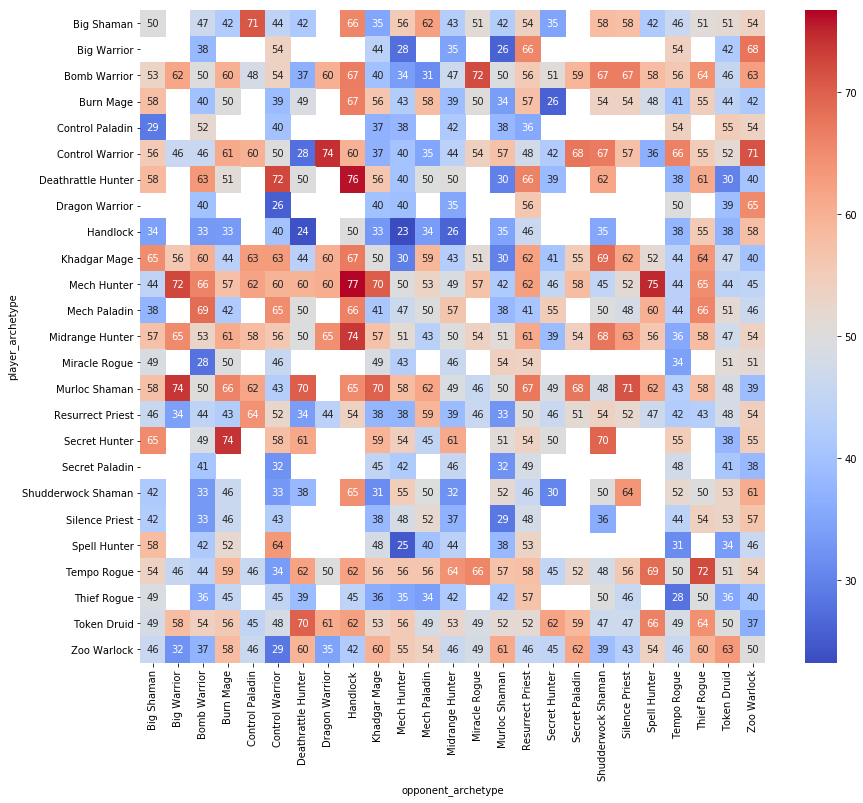

In [62]:
plt.figure(figsize= (14,12))
df_heatmap = df_may10.pivot("player_archetype", "opponent_archetype", "win_rate")
sns.heatmap(df_heatmap, annot = True, cmap = 'coolwarm')

# HOW to add a column at the end with the average win rates? though it will be unbalanced since the number
# of games is vastly different between others. 

# https://stackoverflow.com/questions/33379261/how-can-i-have-a-bar-next-to-python-seaborn-heatmap-which-shows-the-summation-of

### Number of matchups

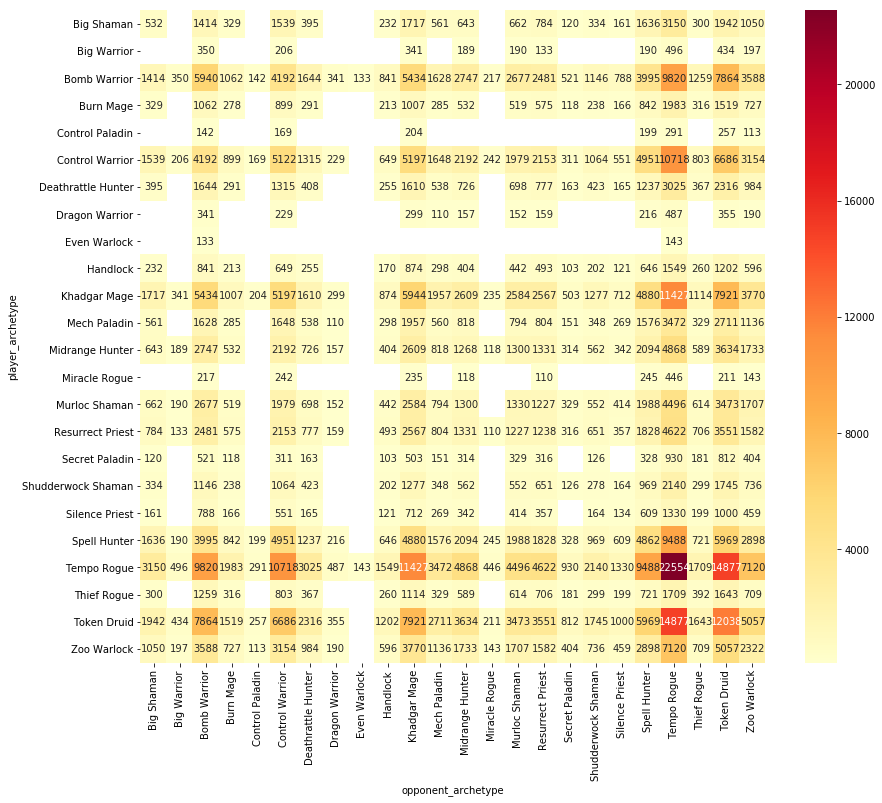

In [75]:
plt.figure(figsize= (14,12))
df_heatmap = df_may2.pivot("player_archetype", "opponent_archetype", "total_games")
sns.heatmap(df_heatmap, annot = True, cmap = "YlOrRd", fmt='g')

# make this upper triangular 


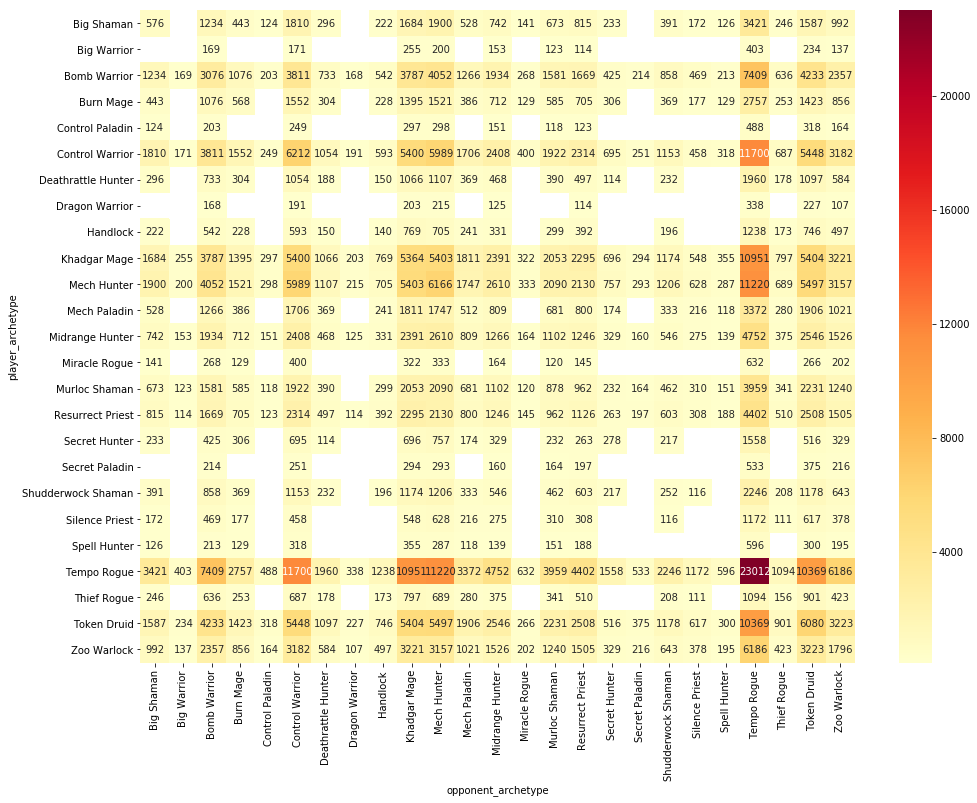

In [77]:
plt.figure(figsize= (16,12))
df_heatmap = df_may10.pivot("player_archetype", "opponent_archetype", "total_games")
sns.heatmap(df_heatmap, annot = True, cmap = "YlOrRd", fmt='g')

# make this upper triangular 
# get a better color scheme

In [ ]:
df_may10[df_may10['player_archetype'] == 'Token Druid']['total_games'].sum()

In [ ]:
To drop:
    

### What new decks arose out of the meta over the past week?

In [66]:
may10_archetypes = list(df_may10.player_archetype.unique())
may02_archetypes = list(df_may2.player_archetype.unique())

In [68]:
set(may10_archetypes).difference(set(may10_archetypes).intersection(set(may02_archetypes)))

{'Mech Hunter', 'Secret Hunter'}

In [69]:
set(may02_archetypes).difference(set(may10_archetypes).intersection(set(may02_archetypes)))

{'Even Warlock'}

We saw the rise of TWO different hunter decks! And the loss of Even Warlock - which is not surprising, considering how few matchups there was with Even Warlock. 

# 2. Manually Importing Deck Data

Also, a note - these are deck ARCHETYPES. There are, for example, many many different Tempo Rogue decks - but they only differ by a single card, maybe two, at most four.  For each archetype, I chose the deck with both the most plays (there are several similar archetypes that only have a few hundred plays, compared to decks that see a lot more plays with several thousand). If there were multiple decks with similarly high rates of play, I chose the one with the better winrate. See here http://metastats.net/archetypedecks/Tempo-Rogue/week/ for an example. 


In [101]:
# Write a function that returns the number of archetypes and their names for each class:

for class_name in player_class_list:
    unique_archetype = df_may10[df_may10['player_class'] == class_name]['player_archetype'].unique()
    print('{} Archetypes of {}:'.format(len(unique_archetype),class_name), unique_archetype)

1 Archetypes of Druid: ['Token Druid']
5 Archetypes of Hunter: ['Deathrattle Hunter' 'Mech Hunter' 'Midrange Hunter' 'Secret Hunter'
 'Spell Hunter']
2 Archetypes of Mage: ['Burn Mage' 'Khadgar Mage']
3 Archetypes of Paladin: ['Control Paladin' 'Mech Paladin' 'Secret Paladin']
2 Archetypes of Priest: ['Resurrect Priest' 'Silence Priest']
3 Archetypes of Rogue: ['Miracle Rogue' 'Tempo Rogue' 'Thief Rogue']
3 Archetypes of Shaman: ['Big Shaman' 'Murloc Shaman' 'Shudderwock Shaman']
2 Archetypes of Warlock: ['Handlock' 'Zoo Warlock']
4 Archetypes of Warrior: ['Big Warrior' 'Bomb Warrior' 'Control Warrior' 'Dragon Warrior']


Even this is really interesting to see: there is only ONE Druid deck in the current meta, whereas there are FIVE different popular Hunter deck archetypes. In terms of the meta, this is VERY interesting:  if your opponent is a Druid, it is very likely you know exactly what archetype of deck he has; whereas if your opponent is a Hunter, you still could be facing one of five different decks.
A note: all of these are the top decks from Sunday, May 5th, to Sunday, May 12th (last week dropdown was selected).

In [135]:
for archetype in may10_archetypes:
    print(archetype, df_may10[df_may10['player_archetype'] == archetype]['total_games'].sum())


Big Shaman 18356
Big Warrior 1959
Bomb Warrior 42383
Burn Mage 15874
Control Paladin 2533
Control Warrior 59674
Deathrattle Hunter 10787
Dragon Warrior 1688
Handlock 7462
Khadgar Mage 57935
Mech Hunter 60200
Mech Paladin 18276
Midrange Hunter 27260
Miracle Rogue 3122
Murloc Shaman 22667
Resurrect Priest 25931
Secret Hunter 7122
Secret Paladin 2697
Shudderwock Shaman 12383
Silence Priest 5955
Spell Hunter 3115
Tempo Rogue 115768
Thief Rogue 8058
Token Druid 59230
Zoo Warlock 34137


In [ ]:
Pretty low plays (under 3k) for the past week include:
    Big Warrior
    Control Paladin
    Dragon Warrior
    Miracle Rogue
    Secret Paladin
    Spell Hunter

## Druid Decks

### Token Druid: 50.71% win rate, 10,217 games

In [143]:
# Token Druid #7311 with 4328 games, win rate 52.93%
token_druid = [
    'Acornbearer',
    'Acornbearer',
    'Crystalsong Portal',
    'Crystalsong Portal',
    'Dreamway Guardians',
    'Dreamway Guardians',
    'EVIL Cable Rat',
    'EVIL Cable Rat',
    'Keeper Stalladris',
    'Power of the Wild',
    'Power of the Wild',
    'Wrath',
    'Wrath',
    'Blessing of the Ancients',
    'Blessing of the Ancients',
    'Landscaping',
    'Landscaping',
    'Savage Roar',
    'Savage Roar',
    'Archmage Vargoth',
    'Mark of the Loa',
    'Mark of the Loa',
    'Soul of the Forest',
    'Soul of the Forest',
    'Swipe',
    'Swipe',
    'Wispering Woods',
    'Wispering Woods',
    "The Forest's Aid",
    "The Forest's Aid"]
len(token_druid)

30

## Hunter Decks

### Deathrattle Hunter: 50.61% win rate, 2232 games

In [146]:
# oof, this isnt great - there are similar deathrattle hunter decks with significant card overlap, but the 
# mechanics are pretty different, and all the plays are fairly low. See here:
# http://metastats.net/decks/Hunter/last7/

#Deathrattle Hunter #7551
#Win-Rate: 53.35%, #Games: 538

deathrattle_hunter = [
    "Springpaw",
    "Springpaw",
    "Tracking",
    "Acidic Swamp Ooze",
    "Fireworks Tech",
    "Fireworks Tech",
    "Headhunter's Hatchet",
    "Headhunter's Hatchet",
    "Animal Companion",
    "Animal Companion",
    "Nine Lives",
    "Nine Lives",
    "Spider Bomb",
    "Spider Bomb",
    "Unleash the Hounds",
    "Unleash the Hounds",
    "Ursatron",
    "Ursatron",
    "Houndmaster Shaw",
    "Marked Shot",
    "Marked Shot",
    "Wing Blast",
    "Wing Blast",
    "Zilliax",
    "Mechanical Whelp",
    "Mechanical Whelp",
    "Oblivitron",
    "Unleash the Beast",
    "Unleash the Beast",
    "Zul'jin"]
len(deathrattle_hunter)

30

### Mech Hunter: 52.45% win rate, 11,068 games

In [147]:
# Mech Hunter #7639
#Win-Rate: 57.44%, #Games: 2862

mech_hunter = [
    "Mecharoo",
    "Mecharoo",
    "Acidic Swamp Ooze",
    "Bomb Toss",
    "Bomb Toss",
    "Dire Wolf Alpha",
    "Dire Wolf Alpha",
    "Fireworks Tech",
    "Fireworks Tech",
    "Galvanizer",
    "Galvanizer",
    "Venomizer",
    "Venomizer", 
    "Spider Bomb",
    "Spider Bomb",
    "Unleash the Hounds",
    "Unleash the Hounds",
    "Ursatron",
    "Ursatron",
    "Explodinator",
    "Explodinator",
    "Replicating Menace",
    "Replicating Menace",
    "Leeroy Jenkins",
    "Wargear",
    "Wargear",
    "Zilliax",
    "Missile Launcher",
    "Missile Launcher",
    "Boommaster Flark"]
len(mech_hunter)

30

### Midrange Hunter - 49.84%, 6322 games

In [148]:
#Midrange Hunter #7322
#Win-Rate: 50.81%, #Games: 2763

midrange_hunter = [
    "Shimmerfly",
    "Shimmerfly",
    "Springpaw",
    "Springpaw",
    "Timber Wolf",
    "Timber Wolf",
    "Tracking",
    "Dire Wolf Alpha",
    "Dire Wolf Alpha",
    "Headhunter's Hatchet",
    "Headhunter's Hatchet",
    "Hench-Clan Hogsteed",
    "Hench-Clan Hogsteed",
    "Scavenging Hyena",
    "Scavenging Hyena",
    "Animal Companion",
    "Animal Companion",
    "Kill Command",
    "Kill Command",
    "Master's Call",
    "Master's Call",
    "Unleash the Hounds",
    "Unleash the Hounds",
    "Dire Frenzy",
    "Dire Frenzy",
    "Tundra Rhino",
    "Savannah Highmane",
    "Unleash the Beast",
    "Unleash the Beast",
    "Zul'jin"]
len(midrange_hunter)

30

### Secret Hunter: 51.75% win rate, 746 games

In [149]:
#Secret Hunter #7756
#Win-Rate: 59.65%, #Games: 565

secret_hunter = [
    "Secretkeeper",
    "Secretkeeper",
    "Explosive Trap",
    "Explosive Trap",
    "Freezing Trap",
    "Freezing Trap",
    "Rat Trap",
    "Rat Trap",
    "Snake Trap",
    "Snipe",
    "Sunreaver Spy",
    "Sunreaver Spy",
    "Animal Companion",
    "Animal Companion",
    "Deadly Shot",
    "Eaglehorn Bow",
    "Eaglehorn Bow",
    "Kill Command",
    "Kill Command",
    "Masked Contender",
    "Masked Contender",
    "Unleash the Hounds",
    "Lifedrinker",
    "Lifedrinker",
    "Marked Shot",
    "Marked Shot",
    "Baited Arrow",
    "Subject 9",
    "Zilliax",
    "Unleash the Beast",
    "Zul'jin"]
len(secret_hunter)

31

### Spell Hunter: 48.13%, 801 games

In [157]:
#Spell Hunter #7335
#Win-Rate: 50.73%, #Games: 205

spell_hunter = [
    "Arcane Shot",
    "Arcane Shot",
    "Rapid Fire",
    "Rapid Fire",
    "Secret Plan",
    "Secret Plan",
    "Tracking",
    "Tracking",
    "Animal Companion",
    "Animal Companion",
    "Deadly Shot",
    "Deadly Shot",
    "Kill Command",
    "Kill Command",
    "Master's Call",
    "Unleash the Hounds",
    "Unleash the Hounds",
    "Marked Shot",
    "Marked Shot",
    "Wing Blast",
    "Wing Blast",
    "Baited Arrow",
    "Baited Arrow",
    "Unleash the Beast",
    "Unleash the Beast",
    "Vereesa Windrunner",
    "Jepetto Joybuzz",
    "Alexstrasza",
    "Malygos",
    "Zul'jin"]
len(spell_hunter)

30

## Mage Decks

### Burn Mage

In [141]:
#Burn Mage #7733
#Win-Rate: 47.90%, #Games: 998


burn_mage = [
    "Elemental Evocation",
    "Elemental Evocation",
    "Magic Trick",
    "Magic Trick",
    "Mirror Image",
    "Mirror Image",
    "Ray of Frost",
    "Ray of Frost",
    "Acidic Swamp Ooze",
    "Khadgar",
    "Mana Cyclone",
    "Mana Cyclone",
    "Sorcerer's Apprentice",
    "Sorcerer's Apprentice",
    "Arcane Intellect",
    "Arcane Intellect",
    "Conjurer's Calling",
    "Conjurer's Calling",
    "Messenger Raven",
    "Messenger Raven",
    "Stargazer Luna",
    "Sandbinder",
    "Giggling Inventor",
    "Zilliax",
    "Archmage Antonidas",
    "Alexstrasza",
    "Sea Giant",
    "Sea Giant",
    "Mountain Giant",
    "Mountain Giant"]
len(burn_mage)

30

### Khadgar Mage

In [152]:
# Khadgar Mage #7487
#Win-Rate: 51.94%, #Games: 3764


khadgar_mage = [
    "Acidic Swamp Ooze",
    "Acidic Swamp Ooze",
    "Book of Specters",
    "Book of Specters",
    "Firetree Witchdoctor",
    "Firetree Witchdoctor",
    "Khadgar",
    "Sunfury Protector",
    "Conjurer's Calling",
    "Conjurer's Calling",
    "Messenger Raven",
    "Messenger Raven",
    "Scaleworm",
    "Scaleworm",
    "Twilight Drake",
    "Twilight Drake",
    "Dragonmaw Scorcher",
    "Harrison Jones",
    "Rotten Applebaum",
    "Zilliax",
    "Safeguard",
    "Astromancer",
    "Astromancer",
    "Crowd Roaster",
    "Crowd Roaster",
    "Power of Creation",
    "Power of Creation",
    "Kalecgos",
    "Mountain Giant",
    "Mountain Giant"]


In [153]:
len(khadgar_mage)

30

## Paladin Decks

### Control Paladin

In [173]:
control_paladin = [
    "Desperate Measures",
    "Desperate Measures",
    "Redemption",
    "Redemption",
    "Flash of Light",
    "Lightforged Blessing",
    "Mysterious Blade",
    "Mysterious Blade",
    "Call to Adventure",
    "Call to Adventure",
    "Archmage Vargoth",
    "Consecration",
    "Consecration",
    "Prismatic Lens",
    "Prismatic Lens",
    "Truesilver Champion",
    "Truesilver Champion",
    "Duel!",
    "Duel!",
    "Zilliax",
    "Amani War Bear",
    "Amani War Bear",
    "Batterhead",
    "Batterhead",
    "Tirion Fordring",
    "Oondasta",
    "Ysera",
    "Big Bad Archmage",
    "Big Bad Archmage",
    "Shirvallah, the Tiger"]
    
len(control_paladin)

30

### Mech Paladin: 

In [163]:
# Mech Paladin #7765
mech_paladin = [
    "Glow-Tron",
    "Glow-Tron",
    "Skaterbot",
    "Skaterbot",
    "Crystology",
    "Crystology",
    "Galvanizer",
    "Galvanizer",
    "Bronze Gatekeeper",
    "Bronze Gatekeeper",
    "Call to Adventure",
    "Call to Adventure",
    "Annoy-o-Module",
    "Annoy-o-Module",
    "Archmage Vargoth",
    "Coppertail Imposter",
    "Prismatic Lens",
    "Prismatic Lens",
    "Truesilver Champion",
    "Truesilver Champion",
    "Mechano-Egg",
    "Mechano-Egg",
    "Wargear",
    "Wargear",
    "Zilliax",
    "Glowstone Technician",
    "Glowstone Technician",
    "Missile Launcher",
    "Kangor's Endless Army",
    "Tirion Fordring"
]
len(mech_paladin)

30

### Secret Paladin

In [ ]:
# maybe get rid of secret paladin since no deck had over 100 plays over the last week?

## Priest Decks

### Resurrect Priest 

In [165]:
resurrect_priest = [
    "Forbidden Words",
    "Forbidden Words",
    "Topsy Turvy",
    "Inner Fire",
    "Inner Fire",
    "Northshire Cleric",
    "Northshire Cleric",
    "Power Word: Shield",
    "Power Word: Shield",
    "Divine Hymn",
    "Divine Hymn",
    "Divine Spirit",
    "Divine Spirit",
    "Shadow Word: Pain",
    "Shadow Word: Death",
    "Archmage Vargoth",
    "Hench-Clan Shadequill",
    "Shadow Madness",
    "Convincing Infiltrator",
    "Mass Hysteria",
    "Mass Hysteria",
    "Witchwood Grizzly",
    "Zilliax",
    "Damaged Stegotron",
    "Damaged Stegotron",
    "Catrina Muerte",
    "Mosh'ogg Enforcer",
    "Mosh'ogg Enforcer",
    "Mass Resurrection",
    "Mass Resurrection"]
len(resurrect_priest)

30

### Silence Priest

In [166]:

silence_priest = [
    "Circle of Healing",
    "Circle of Healing",
    "Silence",
    "Silence",
    "Inner Fire",
    "Inner Fire",
    "Northshire Cleric",
    "Northshire Cleric",
    "Power Word: Shield",
    "Power Word: Shield",
    "Ancient Watcher",
    "Ancient Watcher",
    "Dalaran Librarian",
    "Dalaran Librarian",
    "Divine Spirit",
    "Divine Spirit",
    "Wild Pyromancer",
    "Wild Pyromancer",
    "Acolyte of Pain",
    "Acolyte of Pain",
    "Arcane Watcher",
    "Arcane Watcher",
    "Faceless Rager",
    "Faceless Rager",
    "Hench-Clan Shadequill",
    "Hench-Clan Shadequill",
    "Unsleeping Soul",
    "Unsleeping Soul",
    "Witchwood Grizzly",
    "Witchwood Grizzly"]
 
len(silence_priest)

30

## Rogue Decks

### Miracle Rogue

In [167]:
miracle_rogue = [
    "Backstab",
    "Backstab",
    "Preparation",
    "Preparation",
    "Shadowstep",
    "Shadowstep",
    "Togwaggle's Scheme",
    "Eviscerate",
    "Eviscerate",
    "Sap",
    "Sap",
    "Blink Fox",
    "Blink Fox",
    "Edwin VanCleef",
    "EVIL Miscreant",
    "EVIL Miscreant",
    "Fan of Knives",
    "Fan of Knives",
    "Hench-Clan Burglar",
    "Hench-Clan Burglar",
    "Vendetta",
    "Vendetta",
    "Barista Lynchen",
    "Gral, the Shark",
    "Leeroy Jenkins",
    "Zilliax",
    "Gadgetzan Auctioneer",
    "Heistbaron Togwaggle",
    "Mountain Giant",
    "Mountain Giant"    
]

len(miracle_rogue)

30

### Tempo Rogue

In [156]:
tempo_rogue = ['Backstab',
               'Backstab',
               'Preparation',
               'Preparation', 
               'Shadowstep',
               'Shadowstep',
                'Deadly Poison',
                'Deadly Poison',
                'Southsea Deckhand',
                'Southsea Deckhand',
                'Eviscarate',
                'Eviscarate',
                'Sap',
                'Sap',
                'Edwin VanCleef',
                'EVIL Miscreant',
                'EVIL Miscreant',
                'Raiding Party',
                'Raiding Party',
                'SI:7 Agent',
                'SI:7 Agent',
                'Dread Corsair',
                'Dread Corsair',
                'Lifedrinker',
                'Lifedrinker',
                'Waggle Pick',
                'Waggle Pick',
                'Captain Greenskin',
                'Leeroy Jenkins',
                "Myra's Unstable Element"]
len(tempo_rogue)

30

### Thief Rogue

In [158]:
thief_rogue = [
    "Backstab",
    "Backstab",
    "Preparation",
    "Preparation",
    "Argent Squire",
    "Argent Squire",
    "Pilfer",
    "Pilfer",
    "Togwaggle's Scheme",
    "Eviscerate",
    "Eviscerate",
    "Underbelly Fence",
    "Underbelly Fence",
    "Blink Fox",
    "Blink Fox",
    "Edwin VanCleef",
    "Face Collector",
    "Fan of Knives",
    "Fan of Knives",
    "SI:7 Agent",
    "SI:7 Agent",
    "Academic Espionage",
    "Hench-Clan Burglar",
    "Hench-Clan Burglar",
    "Vendetta",
    "Vendetta",
    "Walk the Plank",
    "Myra's Unstable Element",
    "Tak Nozwhisker",
    "Tess Greymane"]

len(thief_rogue)

30

## Shaman Decks

### Big Shaman: 47.72%, 3767 games

In [159]:
#Big Shaman #7707
#Win-Rate: 47.22%, #Games: 1855

big_shaman = [
    "Ancestral Healing",
    "Ancestral Healing",
    "Earth Shock",
    "Earth Shock",
    "Ancestral Spirit",
    "Ancestral Spirit",
    "Big Bad Voodoo",
    "Big Bad Voodoo",
    "Witch's Brew",
    "Far Sight",
    "Far Sight",
    "Haunting Visions",
    "Haunting Visions",
    "Spirit of the Frog",
    "Hex",
    "Hex",
    "Hagatha's Scheme",
    "Hagatha's Scheme",
    "Muckmorpher",
    "Muckmorpher",
    "Zilliax",
    "Cairne Bloodhoof",
    "Eureka!",
    "Eureka!",
    "Al'Akir the Windlord",
    "Hagatha the Witch",
    "Walking Fountain",
    "Walking Fountain",
    "Ysera",
    "Big Bad Archmage"]
len(big_shaman)

30

### Murloc Shaman

In [160]:
#Murloc Shaman #7434
#Win-Rate: 53.15%, #Games: 1906

murloc_shaman = [
    "Grimscale Oracle",
    "Grimscale Oracle",
    "Murloc Raider",
    "Murloc Raider",
    "Murloc Tidecaller",
    "Murloc Tidecaller",
    "Sludge Slurper",
    "Sludge Slurper",
    "Toxfin",
    "Bluegill Warrior",
    "Bluegill Warrior",
    "Ghost Light Angler",
    "Ghost Light Angler",
    "Murloc Tidehunter",
    "Murloc Tidehunter",
    "Soul of the Murloc",
    "Soul of the Murloc",
    "Underbelly Angler",
    "Underbelly Angler",
    "Coldlight Seer",
    "Coldlight Seer",
    "Murloc Warleader",
    "Murloc Warleader",
    "Nightmare Amalgam",
    "Nightmare Amalgam",
    "Murloc Tastyfin",
    "Murloc Tastyfin",
    "Scargil",
    "Bloodlust",
    "Bloodlust"]
len(murloc_shaman)

30

### Shudderwock Shaman

In [161]:
#Shudderwock Shaman #7676
#Win-Rate: 44.08%, #Games: 1055


shudderwock_shaman = [
    "Ancestral Healing",
    "Ancestral Healing",
    "Earth Shock",
    "Acidic Swamp Ooze",
    "Acidic Swamp Ooze",
    "Wild Pyromancer",
    "Wild Pyromancer",
    "Witch's Brew",
    "Acolyte of Pain",
    "Acolyte of Pain",
    "Far Sight",
    "Far Sight",
    "Lightning Storm",
    "Mind Control Tech",
    "Mind Control Tech",
    "Hex",
    "Hex",
    "Omega Defender",
    "Twilight Drake",
    "Twilight Drake",
    "Giggling Inventor",
    "Giggling Inventor",
    "Hagatha's Scheme",
    "Hagatha's Scheme",
    "Zilliax",
    "Swampqueen Hagatha",
    "Hagatha the Witch",
    "Walking Fountain",
    "Walking Fountain",
    "Shudderwock"]
len(shudderwock_shaman)

30

## Warlock Decks

### Handlock

In [168]:
#7450

handlock = [
    "Mortal Coil",
    "Mortal Coil",
    "Acidic Swamp Ooze",
    "Doomsayer",
    "Doomsayer",
    "Sunfury Protector",
    "Sunfury Protector",
    "Earthen Ring Farseer",
    "Earthen Ring Farseer",
    "Sense Demons",
    "Shadow Bolt",
    "Voodoo Doll",
    "Hellfire",
    "Hellfire",
    "Spellbreaker",
    "Travelling Healer",
    "Twilight Drake",
    "Twilight Drake",
    "Sunreaver Warmage",
    "Sunreaver Warmage",
    "Zilliax",
    "Aranasi Broodmother",
    "Siphon Soul",
    "Siphon Soul",
    "Lord Godfrey",
    "Twisting Nether",
    "Twisting Nether",
    "Lord Jaraxxus",
    "Mountain Giant",
    "Mountain Giant"
]
len(handlock)

30

### Zoo Warlock

In [169]:
#7445

zoo_warlock = [
    "Abusive Sergeant",
    "Abusive Sergeant",
    "Argent Squire",
    "Argent Squire",
    "Crystallizer",
    "Crystallizer",
    "Flame Imp",
    "Flame Imp",
    "Grim Rally",
    "Grim Rally",
    "Mecharoo",
    "Mecharoo",
    "Saronite Taskmaster",
    "Saronite Taskmaster",
    "The Soularium",
    "Voidwalker",
    "Voidwalker",
    "Dire Wolf Alpha",
    "Dire Wolf Alpha",
    "EVIL Genius",
    "EVIL Genius",
    "Knife Juggler",
    "Knife Juggler",
    "Scarab Egg",
    "Scarab Egg",
    "Magic Carpet",
    "Magic Carpet",
    "Arch-Villain Rafaam",
    "Sea Giant",
    "Sea Giant"]
len(zoo_warlock)


30

## Warrior Decks

### Big Warrior

In [170]:
#7475
big_warrior = [
    "Shield Slam",
    "Shield Slam",
    "Whirlwind",
    "Execute",
    "Execute",
    "Slam",
    "Slam",
    "Sweeping Strikes",
    "Sweeping Strikes",
    "Warpath",
    "Warpath",
    "Shield Block",
    "Shield Block",
    "Brawl",
    "Brawl",
    "Supercollider",
    "Supercollider",
    "Witchwood Grizzly",
    "Witchwood Grizzly",
    "Zilliax",
    "Amani War Bear",
    "Amani War Bear",
    "Dr. Boom, Mad Genius",
    "Akali, the Rhino",
    "Grommash Hellscream",
    "Oondasta",
    "The Boomship",
    "Dimensional Ripper",
    "Dimensional Ripper",
    "The Boom Reaver"
]
len(big_warrior)

30

### Bomb Warrior

In [171]:
#7516

bomb_warrior = [
    "Eternium Rover",
    "Eternium Rover",
    "Omega Assembly",
    "Omega Assembly",
    "Shield Slam",
    "Shield Slam",
    "Town Crier",
    "Slam",
    "Warpath",
    "Warpath",
    "Augmented Elekk",
    "Augmented Elekk",
    "Clockwork Goblin",
    "Clockwork Goblin",
    "Shield Block",
    "Shield Block",
    "Militia Commander",
    "Militia Commander",
    "Wrenchcalibur",
    "Wrenchcalibur",
    "Brawl",
    "Brawl",
    "Dyn-o-matic",
    "Dyn-o-matic",
    "Seaforium Bomber",
    "Seaforium Bomber",
    "Zilliax",
    "Blastmaster Boom",
    "Dr. Boom, Mad Genius",
    "Archivist Elysiana"]
len(bomb_warrior)

30

### Control Warrior

In [172]:
#7787

control_warrior = [
    "Eternium Rover",
    "Eternium Rover",
    "Omega Assembly",
    "Omega Assembly",
    "Shield Slam",
    "Shield Slam",
    "Town Crier",
    "Town Crier",
    "Baleful Banker",
    "Execute",
    "Warpath",
    "Warpath",
    "Weapons Project",
    "Weapons Project",
    "Shield Block",
    "Shield Block",
    "Militia Commander",
    "Militia Commander",
    "Omega Devastator",
    "Omega Devastator",
    "Brawl",
    "Brawl",
    "Darius Crowley",
    "Dyn-o-matic",
    "Dyn-o-matic",
    "Harrison Jones",
    "Supercollider",
    "Zilliax",
    "Dr. Boom, Mad Genius",
    "Archivist Elysiana"]

len(control_warrior)

30

### Dragon Warrior

In [204]:
# too small and similar, no dragon warrior.

## Put them together into a dataframe!

In [219]:
# I'm amazing.

columns_list = []
for archetype in may10_archetypes:
    columns_list.append(archetype.lower().replace(' ', '_'))
columns_list

['big_shaman',
 'big_warrior',
 'bomb_warrior',
 'burn_mage',
 'control_paladin',
 'control_warrior',
 'deathrattle_hunter',
 'dragon_warrior',
 'handlock',
 'khadgar_mage',
 'mech_hunter',
 'mech_paladin',
 'midrange_hunter',
 'miracle_rogue',
 'murloc_shaman',
 'resurrect_priest',
 'secret_hunter',
 'secret_paladin',
 'shudderwock_shaman',
 'silence_priest',
 'spell_hunter',
 'tempo_rogue',
 'thief_rogue',
 'token_druid',
 'zoo_warlock']

In [220]:
', '.join(columns_list)

'big_shaman, big_warrior, bomb_warrior, burn_mage, control_paladin, control_warrior, deathrattle_hunter, dragon_warrior, handlock, khadgar_mage, mech_hunter, mech_paladin, midrange_hunter, miracle_rogue, murloc_shaman, resurrect_priest, secret_hunter, secret_paladin, shudderwock_shaman, silence_priest, spell_hunter, tempo_rogue, thief_rogue, token_druid, zoo_warlock'

In [221]:
columns_list.remove('dragon_warrior') 
columns_list.remove('secret_paladin') 

In [222]:
columns_list

['big_shaman',
 'big_warrior',
 'bomb_warrior',
 'burn_mage',
 'control_paladin',
 'control_warrior',
 'deathrattle_hunter',
 'handlock',
 'khadgar_mage',
 'mech_hunter',
 'mech_paladin',
 'midrange_hunter',
 'miracle_rogue',
 'murloc_shaman',
 'resurrect_priest',
 'secret_hunter',
 'shudderwock_shaman',
 'silence_priest',
 'spell_hunter',
 'tempo_rogue',
 'thief_rogue',
 'token_druid',
 'zoo_warlock']

In [223]:
decks_df = pd.DataFrame(list(zip(big_shaman, big_warrior, bomb_warrior, burn_mage, control_paladin, control_warrior, deathrattle_hunter, handlock, khadgar_mage, mech_hunter, mech_paladin, midrange_hunter, miracle_rogue, murloc_shaman, resurrect_priest, secret_hunter, shudderwock_shaman, silence_priest, spell_hunter, tempo_rogue, thief_rogue, token_druid, zoo_warlock)),
              columns=columns_list)

In [225]:
decks_df.head()

,big_shaman,big_warrior,bomb_warrior,burn_mage,control_paladin,control_warrior,deathrattle_hunter,handlock,khadgar_mage,mech_hunter,...,murloc_shaman,resurrect_priest,secret_hunter,shudderwock_shaman,silence_priest,spell_hunter,tempo_rogue,thief_rogue,token_druid,zoo_warlock
0,Ancestral Healing,Shield Slam,Eternium Rover,Elemental Evocation,Desperate Measures,Eternium Rover,Springpaw,Mortal Coil,Acidic Swamp Ooze,Mecharoo,...,Grimscale Oracle,Forbidden Words,Secretkeeper,Ancestral Healing,Circle of Healing,Arcane Shot,Backstab,Backstab,Acornbearer,Abusive Sergeant
1,Ancestral Healing,Shield Slam,Eternium Rover,Elemental Evocation,Desperate Measures,Eternium Rover,Springpaw,Mortal Coil,Acidic Swamp Ooze,Mecharoo,...,Grimscale Oracle,Forbidden Words,Secretkeeper,Ancestral Healing,Circle of Healing,Arcane Shot,Backstab,Backstab,Acornbearer,Abusive Sergeant
2,Earth Shock,Whirlwind,Omega Assembly,Magic Trick,Redemption,Omega Assembly,Tracking,Acidic Swamp Ooze,Book of Specters,Acidic Swamp Ooze,...,Murloc Raider,Topsy Turvy,Explosive Trap,Earth Shock,Silence,Rapid Fire,Preparation,Preparation,Crystalsong Portal,Argent Squire
3,Earth Shock,Execute,Omega Assembly,Magic Trick,Redemption,Omega Assembly,Acidic Swamp Ooze,Doomsayer,Book of Specters,Bomb Toss,...,Murloc Raider,Inner Fire,Explosive Trap,Acidic Swamp Ooze,Silence,Rapid Fire,Preparation,Preparation,Crystalsong Portal,Argent Squire
4,Ancestral Spirit,Execute,Shield Slam,Mirror Image,Flash of Light,Shield Slam,Fireworks Tech,Doomsayer,Firetree Witchdoctor,Bomb Toss,...,Murloc Tidecaller,Inner Fire,Freezing Trap,Acidic Swamp Ooze,Inner Fire,Secret Plan,Shadowstep,Argent Squire,Dreamway Guardians,Crystallizer


In [227]:
#save it!

decks_df.to_csv('decklist_df.csv',index = False)

Notes from Dave's talk:

semi-supervised learning! we know some of the answers, but we dont know all of the answers.

- characteristics of the cards - predict what TYPE of deck it is given some cards
 - aggro, midrange, control, (style)
 
 - mech , dragon, deathrattle,  (themes)
